In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('Tables of Global and Hemispheric.csv', na_values= '***', header=1)
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.25,-0.09,-0.16,-0.09,-0.22,-0.20,-0.09,-0.15,-0.22,-0.22,-0.18,-0.17,NaN,NaN,-0.11,-0.17,-0.20
1,1881,-0.19,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.18,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19
2,1882,0.16,0.14,0.05,-0.15,-0.13,-0.22,-0.16,-0.07,-0.14,-0.23,-0.17,-0.36,-0.11,-0.08,0.08,-0.08,-0.15,-0.18
3,1883,-0.29,-0.36,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.17,-0.20,-0.34,-0.16,-0.09,-0.19
4,1884,-0.12,-0.08,-0.36,-0.40,-0.33,-0.35,-0.30,-0.28,-0.27,-0.25,-0.33,-0.30,-0.28,-0.27,-0.10,-0.36,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.17,1.24,1.17,1.12,1.01,0.91,0.89,0.86,0.98,0.87,1.10,0.79,1.01,1.04,1.17,1.10,0.89,0.98
141,2021,0.81,0.64,0.89,0.76,0.79,0.84,0.92,0.82,0.92,0.99,0.93,0.87,0.85,0.84,0.75,0.81,0.86,0.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,0.89,0.96,0.73,0.80,0.89,0.90,0.89,0.91,0.94,0.86
143,2023,0.87,0.96,1.22,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.42,1.35,1.17,1.12,0.88,1.05,1.15,1.41


In [3]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,144.000000,144.000000,144.000000,144.000000,144.000000,143.000000,144.00000,145.000000,145.000000,144.000000
mean,1952.000000,0.069517,0.077586,0.094897,0.069172,0.059310,0.047172,0.071034,0.069793,0.066181,0.090903,0.084236,0.059097,0.065764,0.066503,0.07000,0.074828,0.062759,0.080556
std,42.001984,0.433726,0.440879,0.446490,0.408757,0.387391,0.387739,0.369949,0.386288,0.376458,0.381643,0.390888,0.406525,0.379804,0.379695,0.41794,0.409488,0.378050,0.377916
min,1880.000000,-0.820000,-0.640000,-0.640000,-0.590000,-0.550000,-0.520000,-0.510000,-0.550000,-0.580000,-0.580000,-0.580000,-0.820000,-0.490000,-0.490000,-0.68000,-0.580000,-0.500000,-0.520000
25%,1916.000000,-0.250000,-0.230000,-0.230000,-0.250000,-0.240000,-0.250000,-0.190000,-0.210000,-0.192500,-0.202500,-0.180000,-0.220000,-0.200000,-0.215000,-0.23000,-0.250000,-0.220000,-0.190000
50%,1952.000000,-0.010000,-0.040000,0.010000,-0.030000,-0.040000,-0.050000,-0.030000,-0.040000,-0.060000,0.010000,0.020000,-0.040000,-0.045000,-0.050000,-0.02500,-0.020000,-0.040000,-0.010000
75%,1988.000000,0.320000,0.390000,0.320000,0.290000,0.280000,0.250000,0.260000,0.260000,0.250000,0.260000,0.242500,0.312500,0.280000,0.285000,0.33250,0.310000,0.270000,0.262500
max,2024.000000,1.240000,1.430000,1.400000,1.320000,1.160000,1.250000,1.210000,1.300000,1.480000,1.340000,1.420000,1.350000,1.170000,1.120000,1.34000,1.300000,1.250000,1.410000


In [4]:
df.shape

(145, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     144 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB


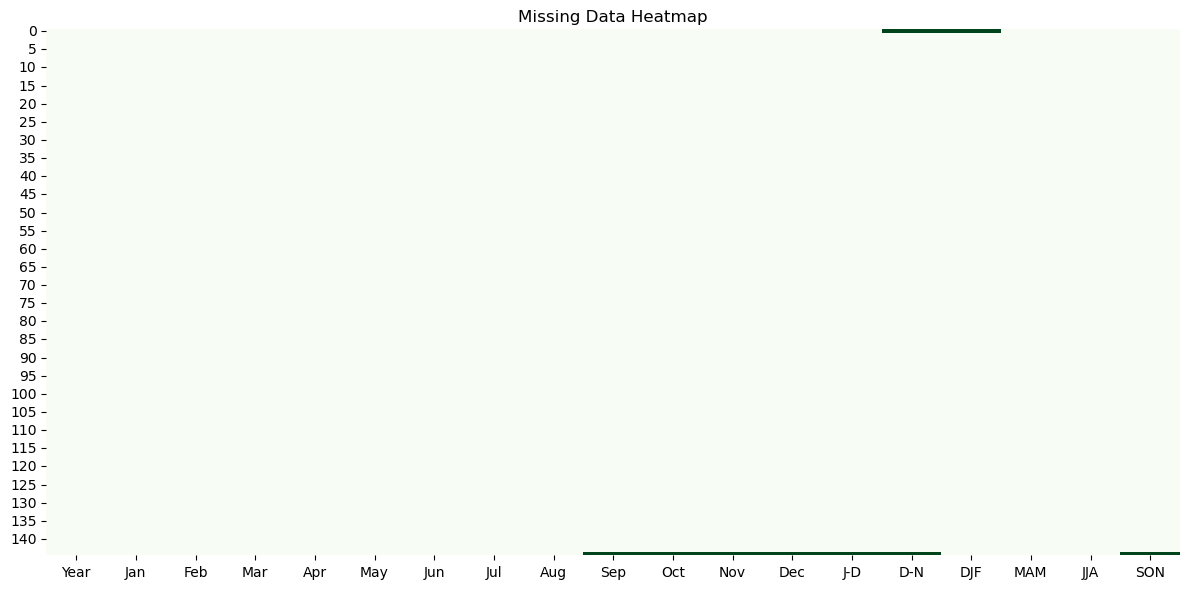

Missing values in each column:
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     0
SON     1
dtype: int64


In [6]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(df.isnull(), cbar=False, cmap='Greens')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

df_missing_sum = df.isnull().sum()
print("Missing values in each column:")
print(df_missing_sum)

### Cleaned Data using interpolate and median

In [7]:
df_inter= df.interpolate()
df_inter['D-N'].fillna(df_inter['D-N'].median(), inplace= True)
df_inter['DJF'].fillna(df_inter['DJF'].median(), inplace = True)

In [8]:
df_inter

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.25,-0.09,-0.16,-0.09,-0.22,-0.20,-0.09,-0.15,-0.22,-0.22,-0.18,-0.17,-0.045,-0.025,-0.11,-0.17,-0.20
1,1881,-0.19,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.18,-0.07,-0.09,-0.100,-0.180,0.04,-0.07,-0.19
2,1882,0.16,0.14,0.05,-0.15,-0.13,-0.22,-0.16,-0.07,-0.14,-0.23,-0.17,-0.36,-0.11,-0.080,0.080,-0.08,-0.15,-0.18
3,1883,-0.29,-0.36,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.17,-0.200,-0.340,-0.16,-0.09,-0.19
4,1884,-0.12,-0.08,-0.36,-0.40,-0.33,-0.35,-0.30,-0.28,-0.27,-0.25,-0.33,-0.30,-0.28,-0.270,-0.100,-0.36,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.17,1.24,1.17,1.12,1.01,0.91,0.89,0.86,0.98,0.87,1.10,0.79,1.01,1.040,1.170,1.10,0.89,0.98
141,2021,0.81,0.64,0.89,0.76,0.79,0.84,0.92,0.82,0.92,0.99,0.93,0.87,0.85,0.840,0.750,0.81,0.86,0.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,0.89,0.96,0.73,0.80,0.89,0.900,0.890,0.91,0.94,0.86
143,2023,0.87,0.96,1.22,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.42,1.35,1.17,1.120,0.880,1.05,1.15,1.41


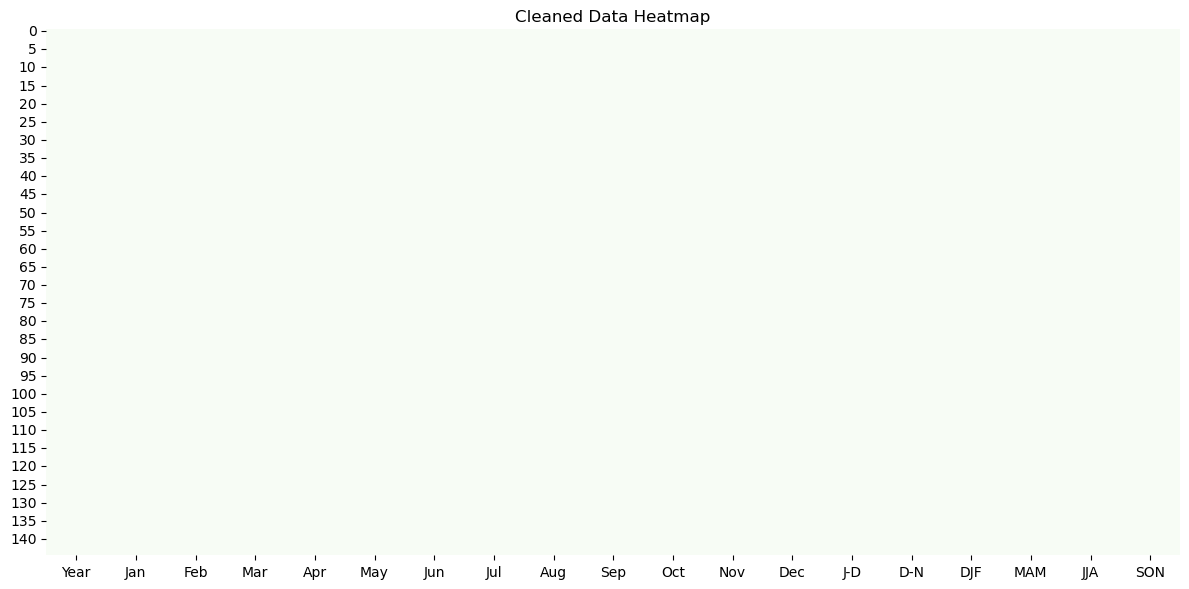

In [9]:
# Visualising Cleaned Data
plt.figure(figsize=(12, 6)) 
sns.heatmap(df_inter.isnull(), cbar=False, cmap='Greens')
plt.title('Cleaned Data Heatmap')
plt.tight_layout()
plt.show()

In [10]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     145 non-null    float64
 15  DJF     145 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB


In [11]:
df_inter.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1952.000000,0.069517,0.077586,0.094897,0.069172,0.059310,0.047172,0.071034,0.069793,0.075931,0.099517,0.093448,0.068000,0.073379,0.073000,0.069345,0.074828,0.062759,0.089724
std,42.001984,0.433726,0.440879,0.446490,0.408757,0.387391,0.387739,0.369949,0.386288,0.393092,0.394209,0.405016,0.419056,0.389434,0.387191,0.416561,0.409488,0.378050,0.392451
min,1880.000000,-0.820000,-0.640000,-0.640000,-0.590000,-0.550000,-0.520000,-0.510000,-0.550000,-0.580000,-0.580000,-0.580000,-0.820000,-0.490000,-0.490000,-0.680000,-0.580000,-0.500000,-0.520000
25%,1916.000000,-0.250000,-0.230000,-0.230000,-0.250000,-0.240000,-0.250000,-0.190000,-0.210000,-0.190000,-0.200000,-0.180000,-0.220000,-0.200000,-0.210000,-0.230000,-0.250000,-0.220000,-0.190000
50%,1952.000000,-0.010000,-0.040000,0.010000,-0.030000,-0.040000,-0.050000,-0.030000,-0.040000,-0.060000,0.010000,0.020000,-0.040000,-0.030000,-0.045000,-0.025000,-0.020000,-0.040000,-0.010000
75%,1988.000000,0.320000,0.390000,0.320000,0.290000,0.280000,0.250000,0.260000,0.260000,0.250000,0.260000,0.280000,0.320000,0.310000,0.290000,0.320000,0.310000,0.270000,0.270000
max,2024.000000,1.240000,1.430000,1.400000,1.320000,1.160000,1.250000,1.210000,1.300000,1.480000,1.340000,1.420000,1.350000,1.170000,1.120000,1.340000,1.300000,1.250000,1.410000


In [12]:
df_inter.to_csv('interpolate_data.csv',index=False)

## Modelling and Visulalisation

##### Decade Analysis and Plotting


In [13]:
df_inter['Decade']=(df_inter['Year']// 10) * 10
decade_avg = df_inter.groupby('Decade')['J-D'].mean().reset_index()
decade_avg               

,Decade,J-D
0,1880,-0.213
1,1890,-0.244
2,1900,-0.321
3,1910,-0.331
4,1920,-0.239
5,1930,-0.121
6,1940,0.045
7,1950,-0.047
8,1960,-0.030
9,1970,0.035


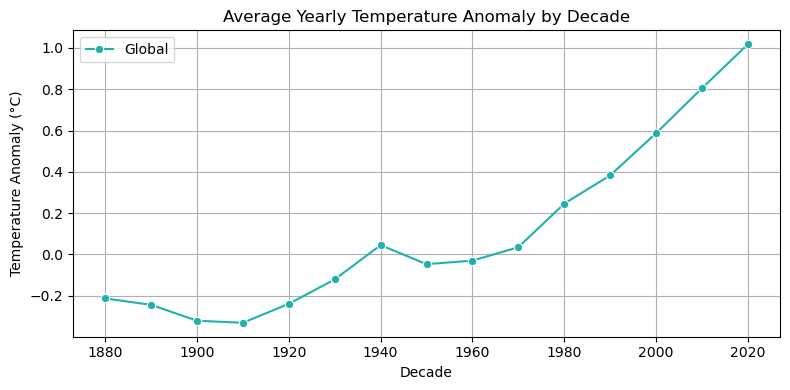

In [40]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Decade', y='J-D',data= decade_avg, marker = 'o', color='lightseagreen', label='Global')
plt.title('Average Yearly Temperature Anomaly by Decade')
plt.xlabel('Decade')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Regression on Decade Data


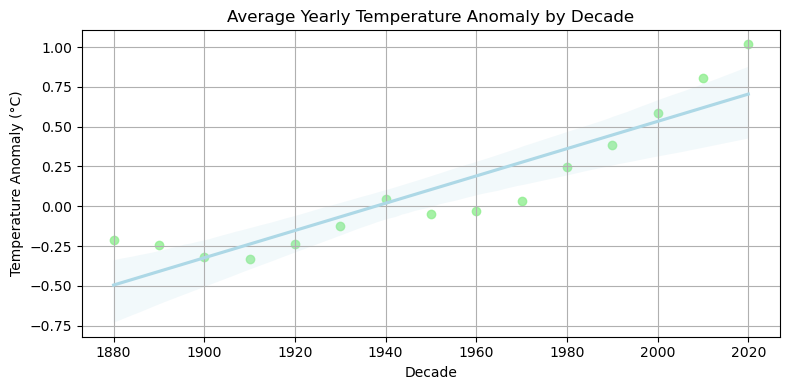

Slope:0.0086°C per decade
R-squared:0.8339


In [42]:
plt.figure(figsize=(8,4))
sns.regplot(x='Decade', y='J-D',data= decade_avg, scatter_kws={'color':'lightgreen'}, line_kws={'color':'lightblue'})
plt.title('Average Yearly Temperature Anomaly by Decade')
plt.xlabel('Decade')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

slope, intercept,r_value,p_value, std_err=linregress(decade_avg['Decade'],decade_avg['J-D'])
print(f"Slope:{slope:.4f}°C per decade")
print(f"R-squared:{r_value**2:.4f}")

####  Monthly and Seasonal Temperature Anomalies


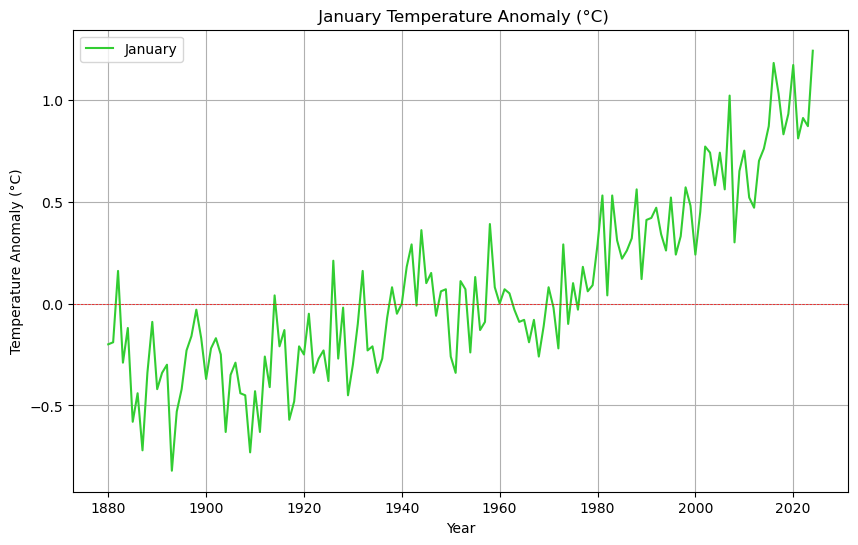

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df_inter['Year'], df_inter['Jan'], label ='January', color='limegreen')
plt.title(' January Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='red', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

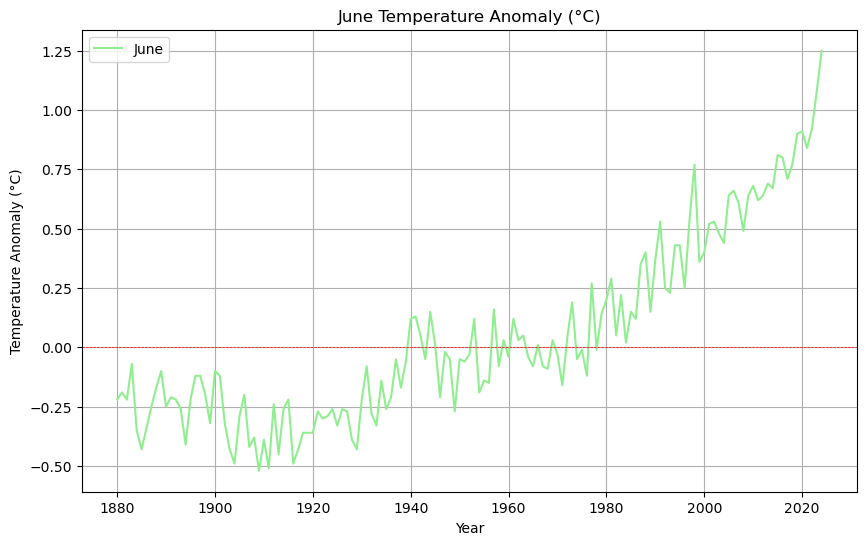

In [44]:
plt.figure(figsize=(10,6))
plt.plot(df_inter['Year'], df_inter['Jun'], label ='June', color='lightgreen')
plt.title('June Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='red', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

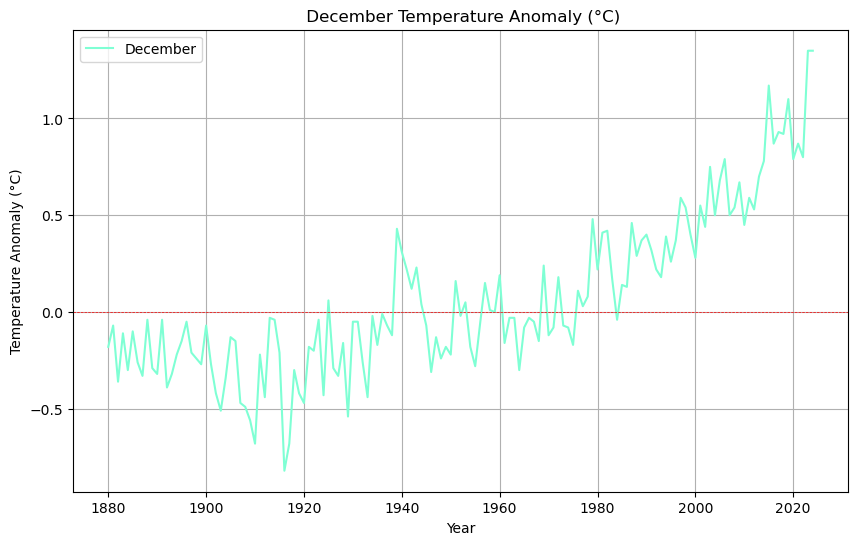

In [45]:
plt.figure(figsize=(10,6))
plt.plot(df_inter['Year'], df_inter['Dec'], label ='December', color='aquamarine')
plt.title(' December Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='red', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

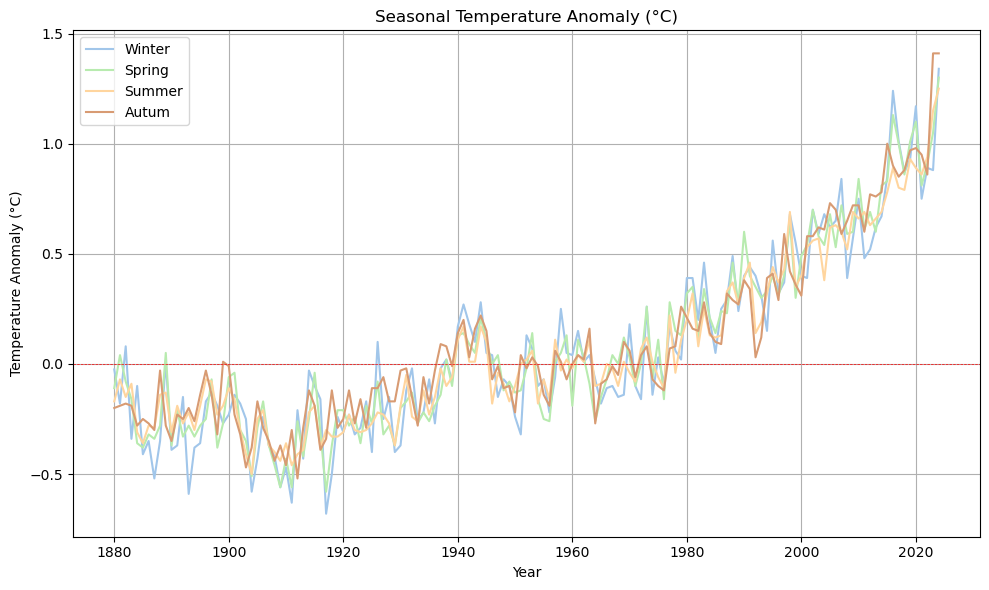

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df_inter['Year'], df_inter['DJF'], label ='Winter', color='#A1C6EA')
plt.plot(df_inter['Year'], df_inter['MAM'], label ='Spring', color='#B8EBAF')
plt.plot(df_inter['Year'], df_inter['JJA'], label ='Summer', color='#FFD59E')
plt.plot(df_inter['Year'], df_inter['SON'], label ='Autum', color='#D89B73')
plt.title('Seasonal Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='red', linewidth=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#### J-D vs D-N Comparison


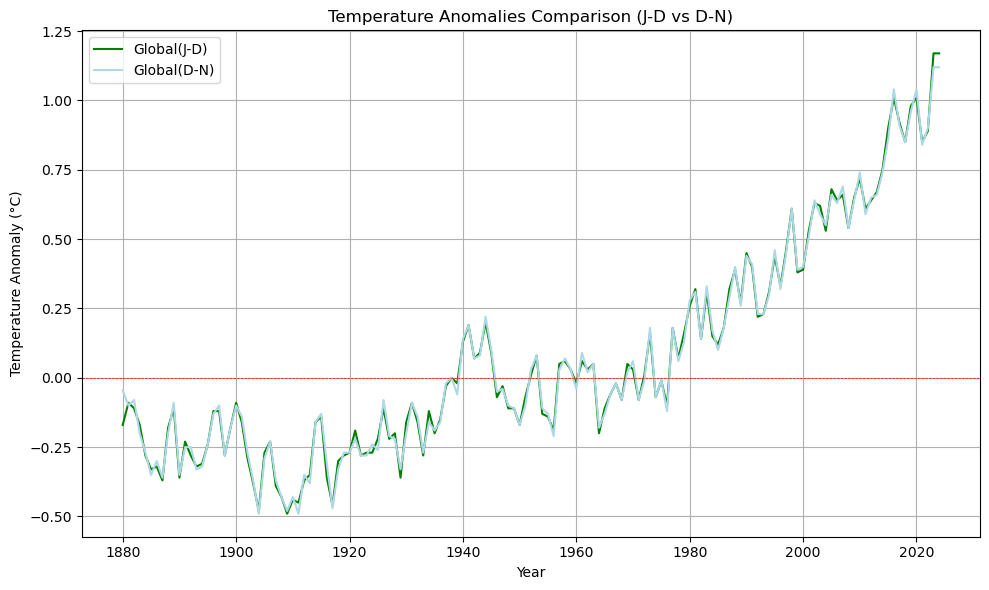

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df_inter['Year'], df_inter['J-D'], label ='Global(J-D)', color='green')
plt.plot(df_inter['Year'], df_inter['D-N'], label ='Global(D-N)', color='lightblue')
plt.title('Temperature Anomalies Comparison (J-D vs D-N)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='red', linewidth=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#### Correlation Analysis

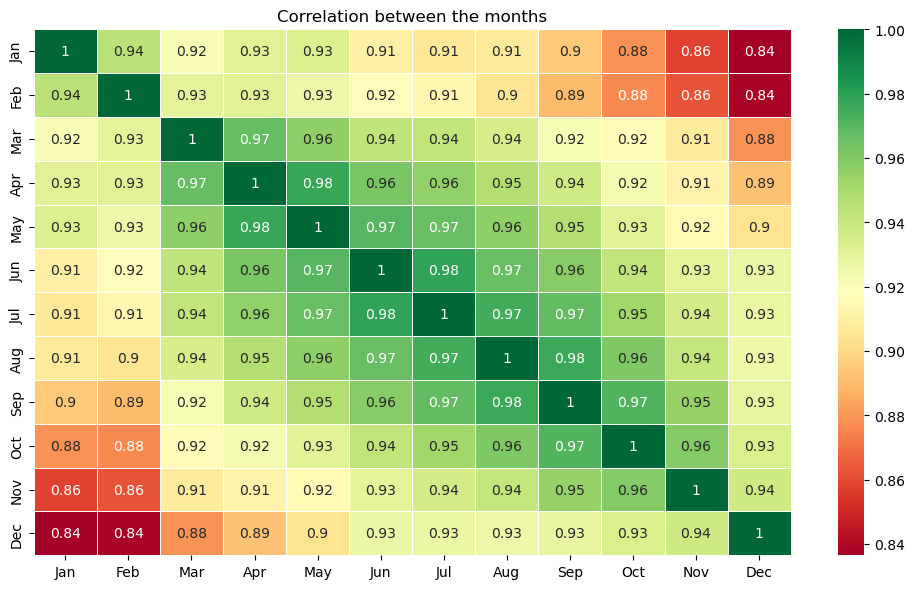

In [49]:
df_temp=df_inter.drop(columns=['Decade','Year','J-D','D-N','DJF','MAM','JJA','SON'])
plt.figure(figsize=(10,6))
corr=df_temp.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation between the months')
plt.tight_layout()
plt.show()

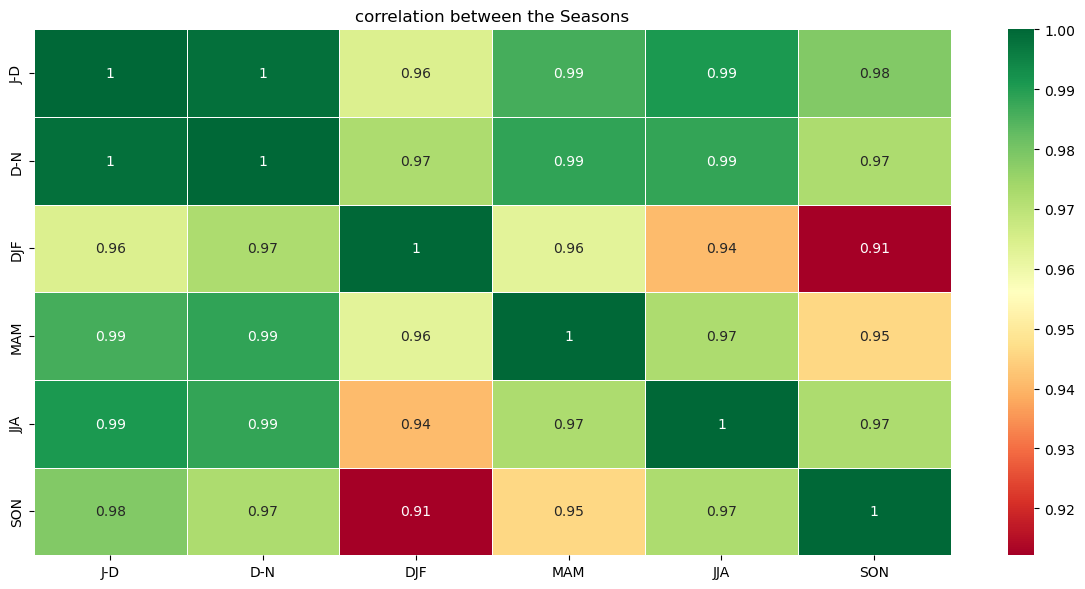

In [23]:
df_temp=df_inter.drop(columns=['Decade','Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',])
plt.figure(figsize=(12,6))
corr=df_temp.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn', linewidths=0.5)
plt.title('correlation between the Seasons')
plt.tight_layout()
plt.show()

### Time series analysis


In [29]:
df_new=df_inter.set_index('Year')
df_new.index = pd.PeriodIndex(df_new.index, freq='Y')
global_series=df_new['J-D']
global_series_winter = df_new['D-N']
df_new.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Decade
Year,,,,,,,,,,,,,,,,,,,
1880,-0.20,-0.25,-0.09,-0.16,-0.09,-0.22,-0.20,-0.09,-0.15,-0.22,-0.22,-0.18,-0.17,-0.045,-0.025,-0.11,-0.17,-0.20,1880
1881,-0.19,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.18,-0.07,-0.09,-0.100,-0.180,0.04,-0.07,-0.19,1880
1882,0.16,0.14,0.05,-0.15,-0.13,-0.22,-0.16,-0.07,-0.14,-0.23,-0.17,-0.36,-0.11,-0.080,0.080,-0.08,-0.15,-0.18,1880
1883,-0.29,-0.36,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.17,-0.200,-0.340,-0.16,-0.09,-0.19,1880
1884,-0.12,-0.08,-0.36,-0.40,-0.33,-0.35,-0.30,-0.28,-0.27,-0.25,-0.33,-0.30,-0.28,-0.270,-0.100,-0.36,-0.31,-0.28,1880


In [30]:
##df_inter.reset_index(inplace=True)

#### Stationarity Test


In [31]:
result = adfuller(global_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("Series is non-stationary and requires differencing.")
else:
    print("Series is stationary and ready for modeling.")


ADF Statistic: 1.5701570439887742
p-value: 0.9977652243575711
Series is non-stationary and requires differencing.


In [32]:
# Differencing
global_series_diff = global_series.diff().dropna()
result = adfuller(global_series_diff)
print('ADF Statistic (after 1st difference):', result[0])
print('p-value (after 1st difference):', result[1])

# Seasonal Differencing
global_series_seasonal_diff = global_series.diff(12).dropna()  
result_seasonal = adfuller(global_series_seasonal_diff)
print('ADF Statistic (after seasonal difference):', result_seasonal[0])
print('p-value (after seasonal difference):', result_seasonal[1])


ADF Statistic (after 1st difference): -7.494662952321469
p-value (after 1st difference): 4.411951373657891e-11
ADF Statistic (after seasonal difference): -1.9495861090374218
p-value (after seasonal difference): 0.30910551003565634


#### Decomposition


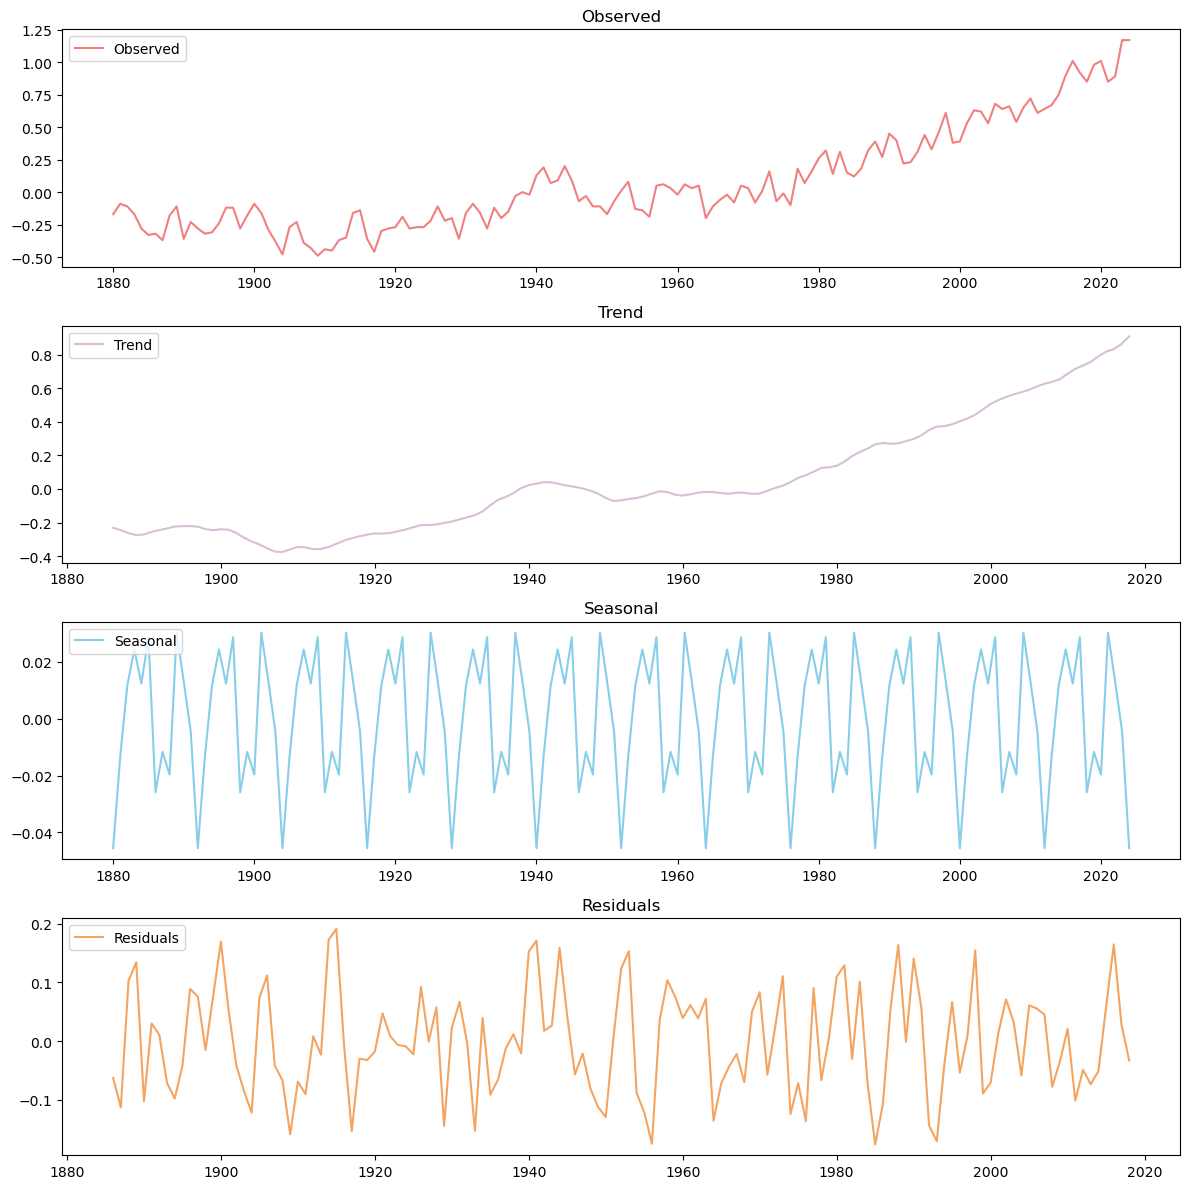

In [37]:
decomposition = seasonal_decompose(global_series, model='additive', period=12)
plt.figure(figsize=(12, 12))
for i, (data, label, color) in enumerate(zip([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid],
                                             ['Observed', 'Trend', 'Seasonal', 'Residuals'],
                                             ['#F08080', '#D8BFD8', '#87CEEB', '#F4A460'])):
    plt.subplot(4, 1, i + 1)
    data= data.to_timestamp()
    plt.plot(data, color=color, label=label)
    plt.title(label)
    plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### ACF and PACF plots before Differencing


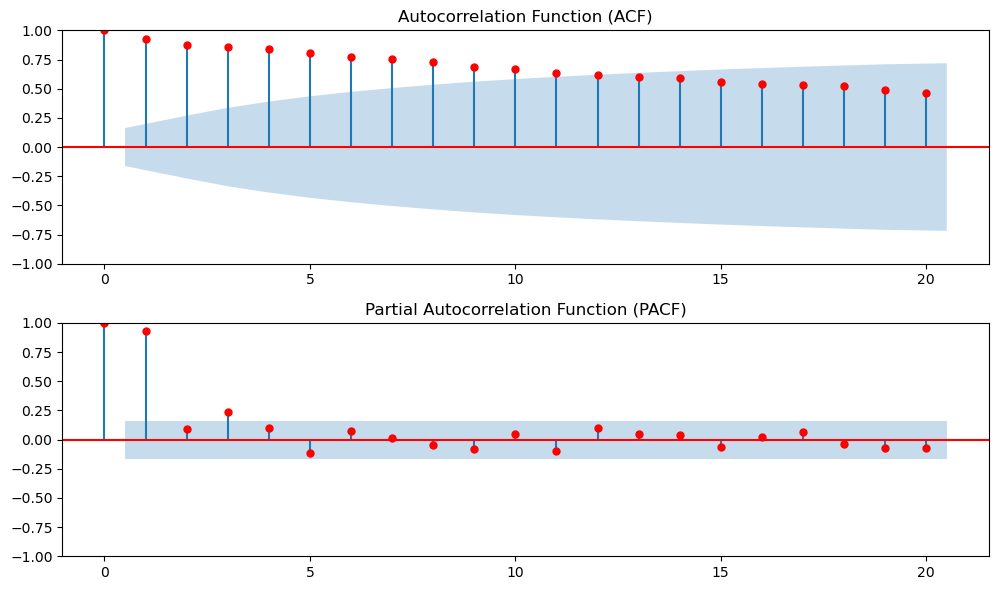

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plot_acf(global_series, lags=20, ax=plt.gca(),color='red')
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2,1,2)
plot_pacf(global_series, lags=20, ax=plt.gca(), method='ywm',color='red')
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

#### ACF and PACF plots After Differencing


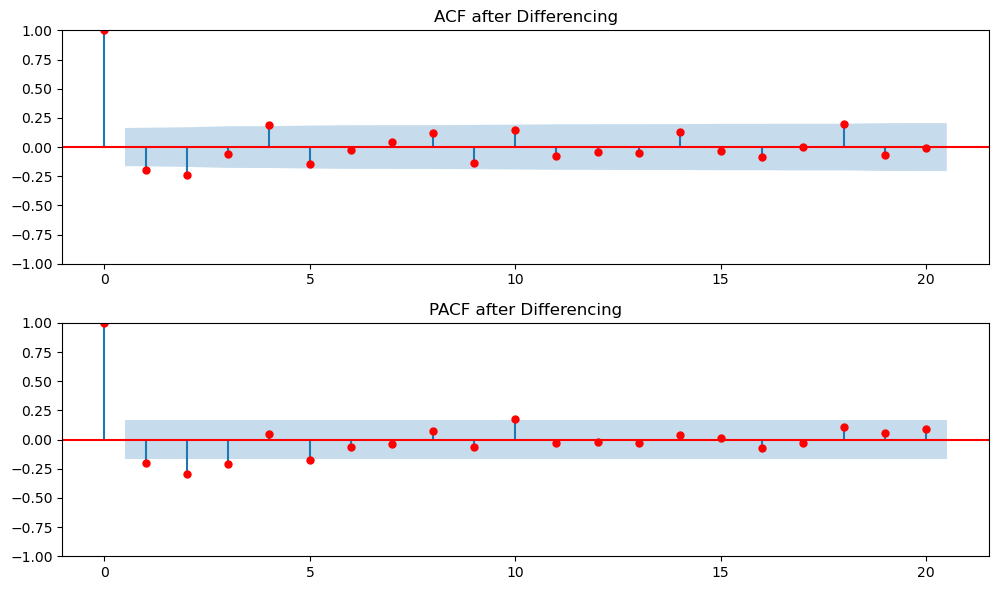

In [36]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plot_acf(global_series_diff, lags=20, ax=plt.gca(),color='red')
plt.title('ACF after Differencing')

plt.subplot(2, 1, 2)
plot_pacf(global_series_diff, lags=20, ax=plt.gca(), method='ywm',color='red')
plt.title('PACF after Differencing')
plt.tight_layout()
plt.show()

#### SARIMA Model


In [38]:
# Using auto_arima to suggest a better model configuration
auto_model = auto_arima(global_series_diff, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-232.866, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-218.683, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-221.402, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-230.755, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-219.687, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-234.683, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-236.512, Time=0.24 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-234.645, Time=0.94 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-237.322, Time=0.30 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-235.446, Time=0.36 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=-235.485, Time=0.40 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-233.703, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-239.274, Time=0.10 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=-237.398, Time=0.20 sec
 ARIMA(0,0,2)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  144
Model:             SARIMAX(1, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood                 129.239
Date:                                 Tue, 05 Nov 2024   AIC                           -242.478
Time:                                         19:31:16   BIC                           -218.720
Sample:                                     12-31-1881   HQIC                          -232.824
                                          - 12-31-2024                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0163      0.005      3.343      0.001       0.007       0.026
ar.L1         -0.9397      0.060    -15.656      0.000      -1.057      -0.822
ma.L1          0.6878      0.104      6.623      0.000       0.484       0.891
ma.L2         -0.4866      0.099     -4.913      0.000      -0.681      -0.292
ma.L3         -0.3191      0.090     -3.542      0.000      -0.496      -0.143
ma.S.L12      -0.1910      0.102     -1.878      0.060      -0.390       0.008
ma.S.L24      -0.2157      0.096     -2.257      0.024      -0.403      -0.028
sigma2         0.0095      0.001      6.662      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 3.54
Prob(Q):                              0.60   Prob(JB):                         0.17
Heteroskedasticity (H):               1.18   Skew:                            -0.12
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\marya\anacon\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


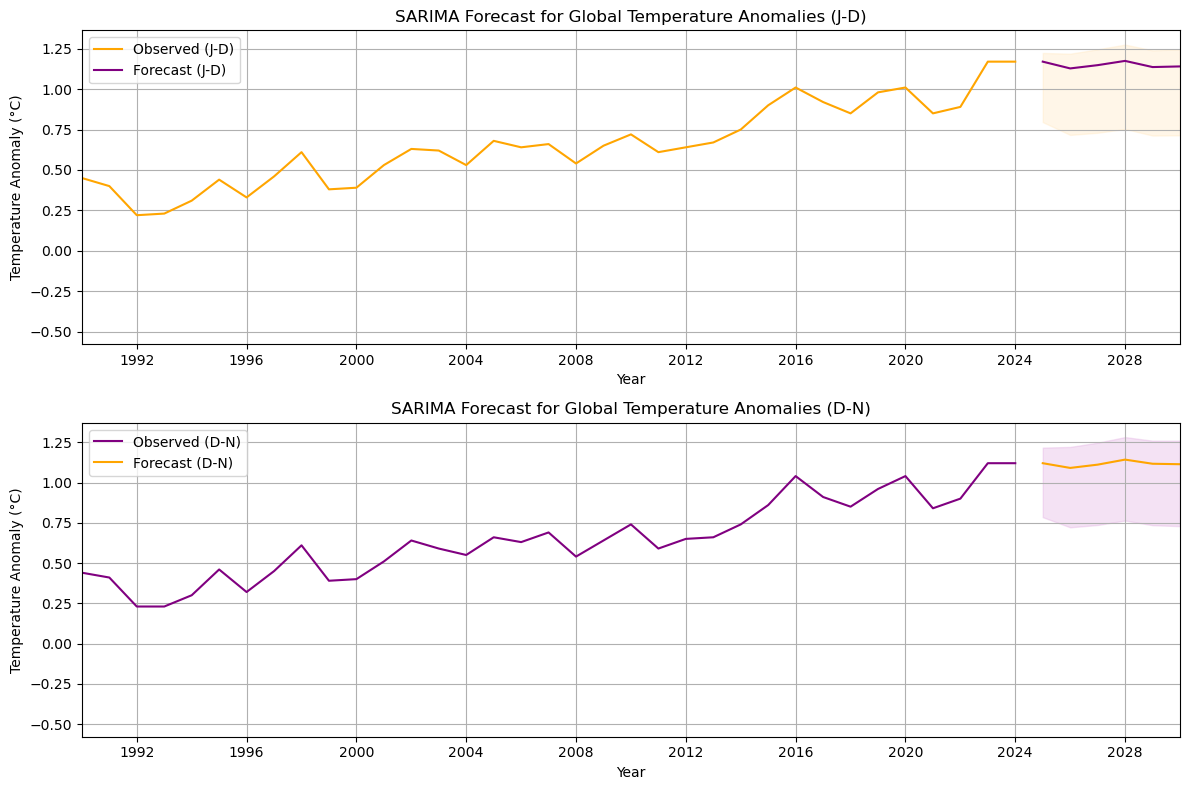

In [47]:
# Defining parameters for SARIMA model and forecast periods
start_plot_year = 1990
forecast_periods = 6

# Forecasting for global_series (J-D)
model_JD = SARIMAX(global_series, order=(1, 0, 3), seasonal_order=(0, 0, 2, 12), trend='t')
result_JD = model_JD.fit()
forecast_JD = result_JD.get_forecast(steps=forecast_periods)

# Converting the last date in global_series index to a timestamp and generating forecast index
last_date_JD = global_series.index[-1].to_timestamp()
forecast_index_JD = [last_date_JD + pd.DateOffset(years=i) for i in range(1, forecast_periods + 1)]

predicted_mean_JD = forecast_JD.predicted_mean
conf_int_JD = forecast_JD.conf_int()
last_observed_value_JD = global_series.iloc[-1]
predicted_mean_JD = last_observed_value_JD + (predicted_mean_JD - predicted_mean_JD.iloc[0])
last_forecast_year_JD = forecast_index_JD[-1]

# Forecast for global_series_winter (D-N)
model_DN = SARIMAX(global_series_winter, order=(1, 0, 3), seasonal_order=(0, 0, 2, 12), trend='t')
result_DN = model_DN.fit()
forecast_DN = result_DN.get_forecast(steps=forecast_periods)

# Converting the last date in global_series index to a timestamp and generating forecast index
last_date_DN = global_series_winter.index[-1].to_timestamp()
forecast_index_DN = [last_date_DN + pd.DateOffset(years=i) for i in range(1, forecast_periods + 1)]

predicted_mean_DN = forecast_DN.predicted_mean
conf_int_DN = forecast_DN.conf_int()
last_observed_value_DN = global_series_winter.iloc[-1]
predicted_mean_DN = last_observed_value_DN + (predicted_mean_DN - predicted_mean_DN.iloc[0])
last_forecast_year_DN = forecast_index_DN[-1]

# Plotting both series
plt.figure(figsize=(12, 8))

# Plot for global_series (J-D)
plt.subplot(2, 1, 1)
plt.plot(global_series.index.to_timestamp(), global_series, label='Observed (J-D)', color='orange')
plt.plot(forecast_index_JD, predicted_mean_JD, label='Forecast (J-D)', color='purple', linestyle='solid')
plt.fill_between(forecast_index_JD, conf_int_JD.iloc[:, 0], conf_int_JD.iloc[:, 1], color='moccasin', alpha=0.3)
plt.title('SARIMA Forecast for Global Temperature Anomalies (J-D)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.xlim(left=pd.Timestamp(str(start_plot_year)), right=last_forecast_year_JD)
plt.grid()

# Plot for global_series_winter (D-N)
plt.subplot(2, 1, 2)
plt.plot(global_series_winter.index.to_timestamp(), global_series_winter, label='Observed (D-N)', color='purple')
plt.plot(forecast_index_DN, predicted_mean_DN, label='Forecast (D-N)', color='orange', linestyle='solid')
plt.fill_between(forecast_index_DN, conf_int_DN.iloc[:, 0], conf_int_DN.iloc[:, 1], color='plum', alpha=0.3)
plt.title('SARIMA Forecast for Global Temperature Anomalies (D-N)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.xlim(left=pd.Timestamp(str(start_plot_year)), right=last_forecast_year_DN)
plt.grid()

plt.tight_layout()
plt.show()
